In [2]:
from binance.cm_futures import CMFutures

cm_futures_client = CMFutures()

# get server time
print(cm_futures_client.time())

cm_futures_client = CMFutures(key="3a6Q0unsfYV8RXpehFENffnE4hgbWcNAaRRVjrEM99dUTt05l9vPQR1tCeZ8RTOh", secret="aDW3Bwd0POckjdUrBm68kMYdm5CGpBW4FiWzVopLPkGuSOhqlwLLevy2VjOEkwIL")

# Get account information
#print(cm_futures_client.account())


{'serverTime': 1681958072755}


In [3]:
from binance.client import Client
import pandas as pd

client = Client(api_key= "3a6Q0unsfYV8RXpehFENffnE4hgbWcNAaRRVjrEM99dUTt05l9vPQR1tCeZ8RTOh", api_secret="aDW3Bwd0POckjdUrBm68kMYdm5CGpBW4FiWzVopLPkGuSOhqlwLLevy2VjOEkwIL")

monedas = ['BTCUSDT', 'XLMUSDT', 'ETHUSDT']
Dataframes_monedas = {}

for moneda in monedas:
    candles = client.get_klines(symbol= moneda, interval=Client.KLINE_INTERVAL_1HOUR, limit = 100)
    len(candles)

    price_df = pd.DataFrame(candles, columns=['dateTime',
                                            'open',
                                            'high', 'low',
                                            'close', 'volume',
                                            'closeTime',
                                            'quoteAssetVolume',
                                            'numberOfTrades',
                                            'takerBuyBaseVol',
                                            'takerBuyQuoteVol', 'ignore'])
    price_df.dateTime = pd.to_datetime(price_df.dateTime, unit='ms')
    price_df.set_index('dateTime')
    price_df.closeTime = pd.to_datetime(price_df.closeTime, unit='ms')
    price_df.close = pd.to_numeric(price_df.close)
    price_df.volume = pd.to_numeric(price_df.volume)
    price_df.high = pd.to_numeric(price_df.high)
    price_df.low = pd.to_numeric(price_df.low)

    ##-------------------------------------------------------- extraemos lista con precios close-------------------------
    lista_precios = [ element for element in price_df['close']]
    Dataframes_monedas[str(moneda)+ '_df'] = lista_precios

In [5]:
def calcular_bollinger_bands(precios, dias=20, k=2):
    # Convertir la lista de precios a una serie de Pandas
    precios = pd.Series(precios)

    # Calcular la media móvil de los precios
    sma = precios.rolling(window=dias).mean()

    # Calcular la desviación estándar de los precios
    std = precios.rolling(window=dias).std()

    # Calcular las bandas de Bollinger superior e inferior
    upper_band = sma + (k * std)
    lower_band = sma - (k * std)

    # Devolver un DataFrame con las bandas de Bollinger y la media móvil
    return pd.DataFrame({'Precio': precios, 'Media Móvil': sma, 'Banda Superior': upper_band, 'Banda Inferior': lower_band})


In [6]:
final1 = calcular_bollinger_bands(precios = Dataframes_monedas['ETHUSDT_df'], dias = 20, k = 4)
final2 = calcular_bollinger_bands(precios = Dataframes_monedas['BTCUSDT_df'], dias = 20, k = 4)
final3 = calcular_bollinger_bands(precios = Dataframes_monedas['XLMUSDT_df'], dias = 20, k = 4)


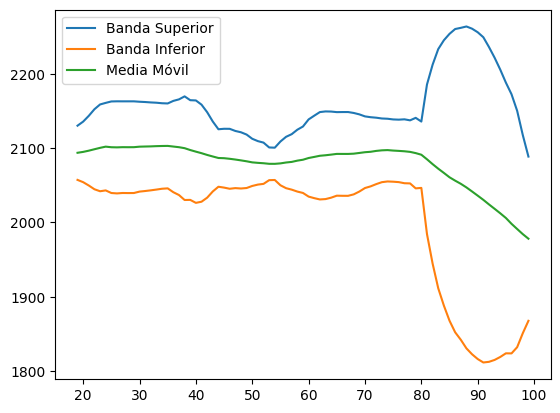

In [7]:
#Grafica de bandas de Bollinger
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
final1.plot( y=['Banda Superior', 'Banda Inferior', 'Media Móvil'], ax=ax)
plt.show()


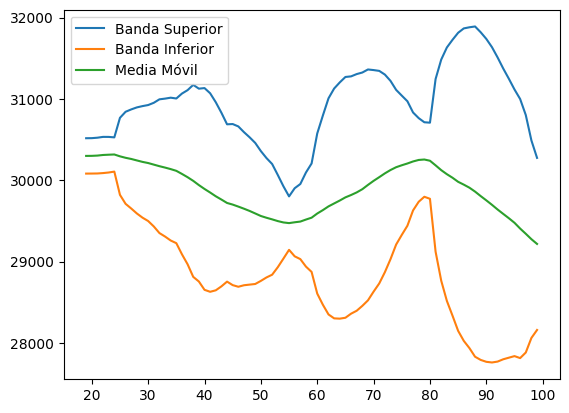

In [8]:
fig, ax = plt.subplots()
final2.plot( y=['Banda Superior', 'Banda Inferior', 'Media Móvil'], ax=ax)
plt.show()

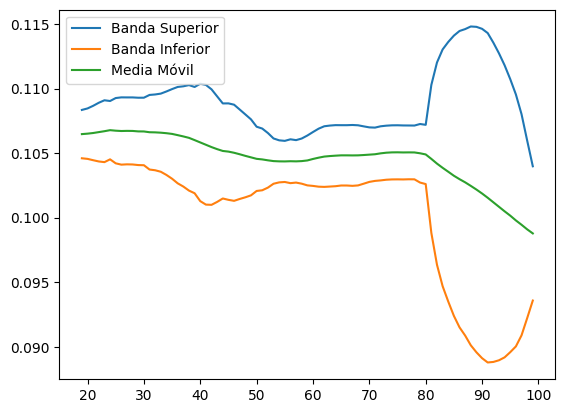

'oe'

In [9]:
fig, ax = plt.subplots()
final3.plot( y=['Banda Superior', 'Banda Inferior', 'Media Móvil'], ax=ax)
plt.show()
"oe"

In [14]:
import pywhatkit

pywhatkit.sendwhatmsg_instantly("+573006281169","Prueba #2")



: 

In [ ]:
def aviso(lista_precios, BS, BI, UP):
    Encima = False
    Debajo = False

    if UP > BS:
        Encima=True
        Debajo = False
        print(f"Moneda:{moneda} --> Esta por encima de la banda de bollinger")
        
    elif UP < BI:
        Debajo=True
        Encima = False
        print(f"Moneda:{moneda} --> Esta por debajo de la banda de bollinger")
    else:
        Encima=False
        Debajo=False
        pass
    
    return [Encima or Debajo, Encima, Debajo]


In [ ]:
from binance.cm_futures import CMFutures
from binance.client import Client
from funciones import *
import pandas as pd
import matplotlib.pyplot as plt
import os
import time


# Enlace conexión a binance
def funcion_comparacion(moneda):
    cm_futures_client = CMFutures(key="3a6Q0unsfYV8RXpehFENffnE4hgbWcNAaRRVjrEM99dUTt05l9vPQR1tCeZ8RTOh", secret="aDW3Bwd0POckjdUrBm68kMYdm5CGpBW4FiWzVopLPkGuSOhqlwLLevy2VjOEkwIL")
    client = Client(api_key= "3a6Q0unsfYV8RXpehFENffnE4hgbWcNAaRRVjrEM99dUTt05l9vPQR1tCeZ8RTOh", api_secret="aDW3Bwd0POckjdUrBm68kMYdm5CGpBW4FiWzVopLPkGuSOhqlwLLevy2VjOEkwIL")

    Dataframes_monedas = {}

    candles = client.get_klines(symbol= moneda, interval=Client.KLINE_INTERVAL_1MINUTE, limit = 1000)
    price_df = pd.DataFrame(candles, columns=['dateTime',
                                            'open',
                                            'high', 'low',
                                            'close', 'volume',
                                            'closeTime',
                                            'quoteAssetVolume',
                                            'numberOfTrades',
                                            'takerBuyBaseVol',
                                            'takerBuyQuoteVol', 'ignore'])
    price_df.close = pd.to_numeric(price_df.close)

    ##-------------------------------------------------------- extraemos lista con precios close-------------------------
    lista_precios = [ element for element in price_df['close']]


    while (len(lista_precios) < 1008): #4800):
        time.sleep(3)
        candles = client.get_klines(symbol= moneda, interval=Client.KLINE_INTERVAL_1MINUTE, limit = 1)
        price_df = pd.DataFrame(candles, columns=['dateTime',
                                                'open',
                                                'high', 'low',
                                                'close', 'volume',
                                                'closeTime',
                                                'quoteAssetVolume',
                                                'numberOfTrades',
                                                'takerBuyBaseVol',
                                                'takerBuyQuoteVol', 'ignore'])
        price_df.close = pd.to_numeric(price_df.close)
        lista_precios.append(price_df['close'][0])
        #print(len(lista_precios))
        #Dataframes_monedas[str(moneda) + '_df'] = lista_precios


        final1 = calcular_bollinger_bands(precios = lista_precios, dias = 1000, k = 1)

        dato = len(lista_precios) - 2
        print(f"Dato= {dato}")
        BS = final1["Banda Superior"][dato] #Banda superior
        print(f"BS= {BS}")
        BI = final1["Banda Inferior"][dato] #Banda inferior
        print(f"BI= {BI}")
        UP = lista_precios[-1] #Ultimo Precio
        print(f"UP= {UP}")
        
        aviso(lista_precios, BS, BI, UP)
    return [lista_precios, BS,BI,UP]

In [ ]:
def comparacion_listafull(lista_precios):
    lista_precios.pop(0)
    candles = client.get_klines(symbol= moneda, interval=Client.KLINE_INTERVAL_1MINUTE, limit = 1)
    price_df = pd.DataFrame(candles, columns=['dateTime',
                                            'open',
                                            'high', 'low',
                                            'close', 'volume',
                                            'closeTime',
                                            'quoteAssetVolume',
                                            'numberOfTrades',
                                            'takerBuyBaseVol',
                                            'takerBuyQuoteVol', 'ignore'])
    price_df.close = pd.to_numeric(price_df.close)
    lista_precios.append(price_df['close'][0])

    #Dataframes_monedas[str(moneda) + '_df'] = lista_precios


    final1 = calcular_bollinger_bands(precios = lista_precios, dias = 1000, k = 0.5)

    dato = len(lista_precios) - 2
    print(f"Dato= {dato}")
    BS = final1["Banda Superior"][dato] #Banda superior
    print(f"BS= {BS}")
    BI = final1["Banda Inferior"][dato] #Banda inferior
    print(f"BI= {BI}")
    UP = lista_precios[-1] #Ultimo Precio
    print(f"Ultimo Precio UP= {UP}")
    
    aviso(lista_precios, BS, BI, UP)
    return [lista_precios, BS, BI, UP]

In [ ]:
while True:
    lista_completa = funcion_comparacion('BTCUSDT')[0]
    comparacion_listafull(lista_completa)

In [ ]:
    PosicionAbierta = True
    PosicionCerrada = False
    sell = True
    buy = False
    ROE = 0.2
    if Encima:
        if PosicionAbierta:
            if sell:
                final1 = calcular_bollinger_bands(precios = lista_precios, dias = 4000, k = 0.5)
                BS = final1["Banda Superior"][dato] #Banda superior

            elif buy:
                if ROE > 0:
                    print('Cerrar posicion/ Tomar ganancias')

                elif ROE < 0:
                    print('Enviar mensaje al wpp o correo')
        
        elif PosicionCerrada:
            if estrecho():
                print('ok')
                pass
            
            elif not(estrecho()):
                print('Vender a precio de BS')